In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/test_pf.csv')

In [6]:
data

,Date,Sales
0,2022-01-01,100
1,2022-01-02,120
2,2022-01-03,130
3,2022-01-04,110
4,2022-01-05,140
5,2022-01-06,150
6,2022-01-07,160
7,2022-01-08,170
8,2022-01-09,180
9,2022-01-10,190


In [7]:
data.columns

Index(['Date', 'Sales'], dtype='object')

In [8]:

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')


In [70]:
data.head()

,Date,Sales
0,2022-01-01,100
1,2022-01-02,120
2,2022-01-03,130
3,2022-01-04,110
4,2022-01-05,140


In [9]:

# Extracting features (X) and target variable (y)
X = data['Date'].dt.dayofyear.values.reshape(-1, 1)  # Day of the year  #reshape is used just to make it 2d as sklearn prediction would require 2d features
y = data['Sales'].values

# why dayofyear when i can do  day  dt.day simply?
just_day= data['Date'].dt.day.values.reshape(-1,1)  #reshape is used just to make it 2d as sklearn prediction would require 2d features


In [10]:
df = pd.DataFrame({'Day of Year': X.flatten(), 'Just Day': just_day.flatten()})   # just_day counts day month-wise  see how it comes to 1 as february starts while dayofyear keeps going 32 33
df

,Day of Year,Just Day
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [11]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:

# Predict future sales for the next 10 days
future_dates = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=10)
print(future_dates)

future_dates_dayofyear = future_dates.dayofyear.values.reshape(-1, 1)
print(future_dates_dayofyear)

predicted_sales = model.predict(future_dates_dayofyear)
print(list(map(round,predicted_sales)))




DatetimeIndex(['2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19',
               '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', freq='D')
[[47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]]
[560, 570, 580, 590, 600, 610, 620, 630, 640, 650]


In [15]:
predicted_sales

array([559.91304348, 569.9093432 , 579.90564292, 589.90194265,
       599.89824237, 609.89454209, 619.89084181, 629.88714154,
       639.88344126, 649.87974098])

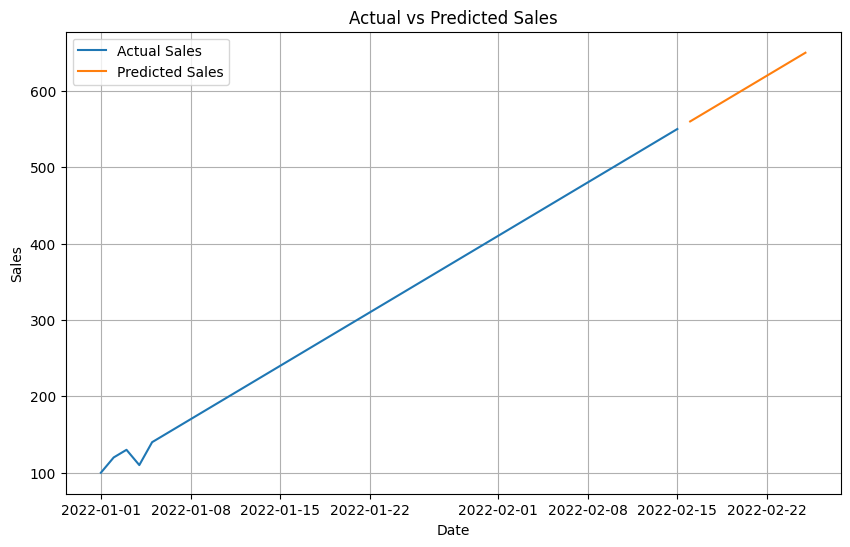

In [16]:
# Plotting the actual sales data and predicted sales
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Actual Sales')
plt.plot(future_dates, predicted_sales, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()